In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [118]:
import pandas as pd
dataset=pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

# Quick analysis of the dataset

In [119]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [120]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data preprocessing

1. Drop rows with null values

In [121]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [122]:
dataset.dropna(inplace=True)
dataset.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

2. Transform non-numerical value to numerical

In [123]:
dummies =pd.get_dummies(dataset.ocean_proximity).astype(int)
dataset_withdummies=dataset.join(dummies).drop('ocean_proximity',axis=1)

3. drop the columns that are not necessary / create new features

<Axes: >

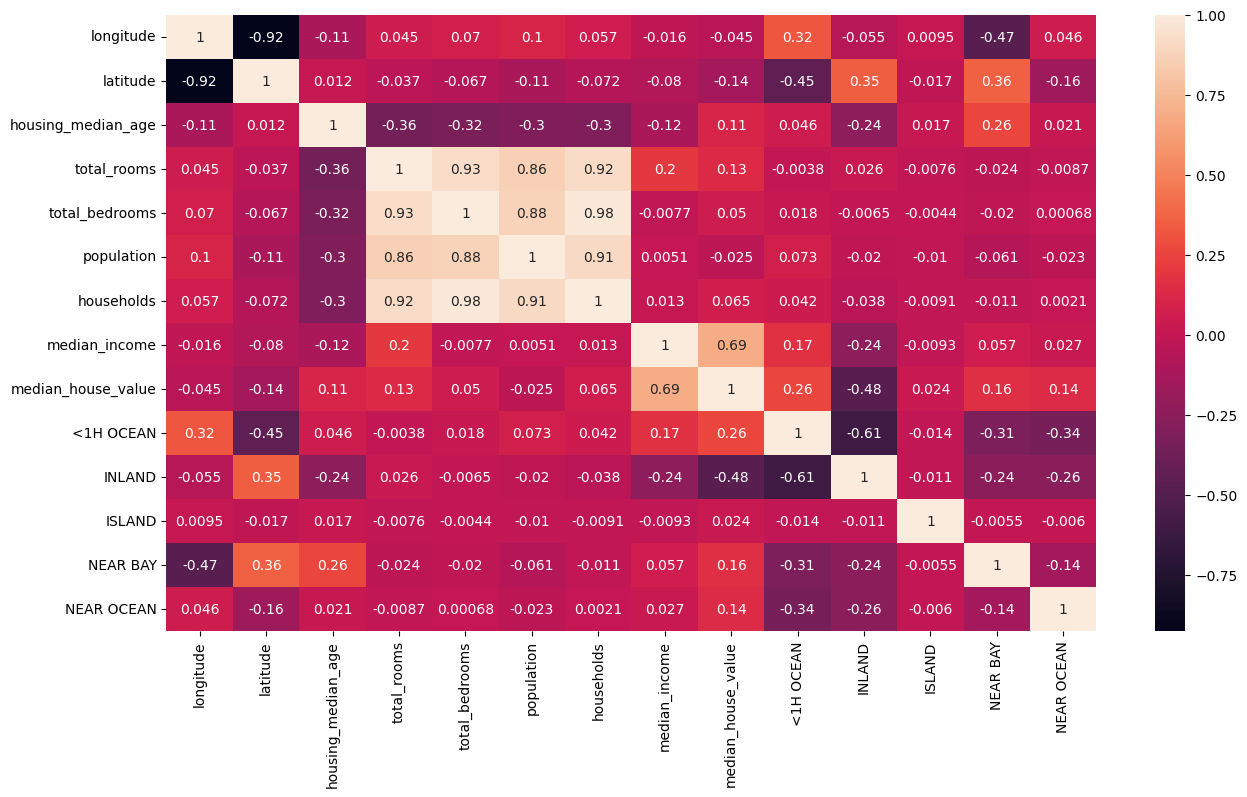

In [124]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset_withdummies.corr(),annot=True)

<Axes: >

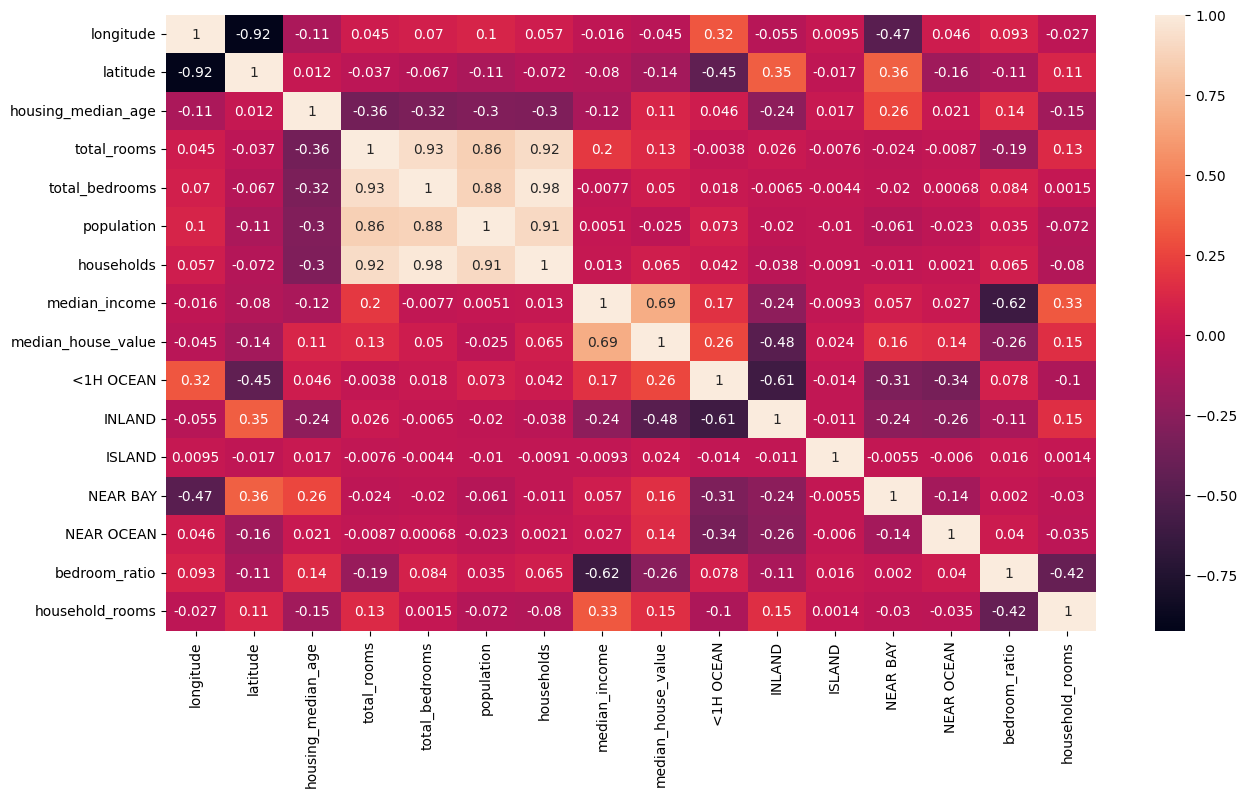

In [125]:
dataset_withdummies['bedroom_ratio']=dataset_withdummies['total_bedrooms']/dataset_withdummies['total_rooms']
dataset_withdummies['household_rooms']=dataset_withdummies['total_rooms']/dataset_withdummies['households']
plt.figure(figsize=(15,8))
sns.heatmap(dataset_withdummies.corr(),annot=True)

4. Separate dependent from independent variables


In [126]:
x=dataset_withdummies.drop('median_house_value',axis =1)
y =dataset_withdummies['median_house_value']

Model Assessment

1. Train_test_split

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=100)  


1. Train the model

In [129]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred =model.predict(x_test)
model.score(x_test,y_test)



0.8183748743190146